# 1- Data

In [1]:
import pandas as pd
## Countries data
countries = pd.read_csv('5countries.csv')
countries 

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
0,0,0,0,331584,Germany,DEU,2015-01-01 00:00:00,2015-01-01 01:00:00,17.93
1,1,1,1,331585,Germany,DEU,2015-01-01 01:00:00,2015-01-01 02:00:00,15.17
2,2,2,2,331586,Germany,DEU,2015-01-01 02:00:00,2015-01-01 03:00:00,16.38
3,3,3,3,331587,Germany,DEU,2015-01-01 03:00:00,2015-01-01 04:00:00,17.38
4,4,4,4,331588,Germany,DEU,2015-01-01 04:00:00,2015-01-01 05:00:00,16.38
...,...,...,...,...,...,...,...,...,...
346915,346915,346915,346915,1343131,Netherlands,NLD,2022-11-30 19:00:00,2022-11-30 20:00:00,414.77
346916,346916,346916,346916,1343132,Netherlands,NLD,2022-11-30 20:00:00,2022-11-30 21:00:00,344.17
346917,346917,346917,346917,1343133,Netherlands,NLD,2022-11-30 21:00:00,2022-11-30 22:00:00,316.83
346918,346918,346918,346918,1343134,Netherlands,NLD,2022-11-30 22:00:00,2022-11-30 23:00:00,274.35


In [2]:
# Selct Country ,Datatime and Price 
countries1= countries[['Country', 'Datetime (Local)','Price (EUR/MWhe)']]

In [3]:
# Rename Datetime (Local) to Date 
countries1.rename(columns = {'Datetime (Local)':'Date'}, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21364\2437268626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries1.rename(columns = {'Datetime (Local)':'Date'}, inplace = True)


In [4]:
# Convert Date to datatime
countries1['Date'] = pd.to_datetime(countries1['Date'])

#  Group by Country and Date
countries1 = countries1.groupby(['Country', pd.Grouper(key='Date', freq='M')])['Price (EUR/MWhe)'].mean().reset_index()

# Set the index 
countries1.reset_index(drop=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21364\3510757401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries1['Date'] = pd.to_datetime(countries1['Date'])


,Country,Date,Price (EUR/MWhe)
0,France,2015-01-31,41.954038
1,France,2015-02-28,50.146637
2,France,2015-03-31,43.812059
3,France,2015-04-30,39.541333
4,France,2015-05-31,26.479610
...,...,...,...
475,Spain,2022-08-31,154.894597
476,Spain,2022-09-30,141.069681
477,Spain,2022-10-31,127.222000
478,Spain,2022-11-30,115.556083


In [5]:
countries1['Date'] = pd.to_datetime(countries1['Date'])

In [6]:
# Date format to Y-m
countries1['Date'] = countries1['Date'].dt.strftime("%Y-%m")

In [7]:
## Import indicators_raw_final
indicators_raw_final = pd.read_excel ('indicators_raw_final.xlsx')

indicators_raw_final

,Date,Country,"Energy, Electricity Production, Index",Industrial Production Index,Unemployment Rate,Infation rate
0,2015-01-01,France,130.18,100.09,11.0,-0.38
1,2015-02-01,France,119.70,99.79,10.8,-0.27
2,2015-03-01,France,111.30,109.25,10.5,-0.07
3,2015-04-01,France,86.09,100.49,10.3,0.08
4,2015-05-01,France,78.45,89.53,10.2,0.30
...,...,...,...,...,...,...
455,2022-04-01,Spain,83.39,95.92,13.0,8.30
456,2022-05-01,Spain,82.49,106.28,12.3,8.50
457,2022-06-01,Spain,87.83,106.46,12.1,10.00
458,2022-07-01,Spain,99.24,102.23,12.2,10.70


In [8]:
# convert Date to datatime
indicators_raw_final['Date'] = pd.to_datetime(indicators_raw_final['Date'])

In [9]:
# convert Date format # date format to Y-m

indicators_raw_final['Date'] = indicators_raw_final['Date'].dt.strftime("%Y-%m")
indicators_raw_final

,Date,Country,"Energy, Electricity Production, Index",Industrial Production Index,Unemployment Rate,Infation rate
0,2015-01,France,130.18,100.09,11.0,-0.38
1,2015-02,France,119.70,99.79,10.8,-0.27
2,2015-03,France,111.30,109.25,10.5,-0.07
3,2015-04,France,86.09,100.49,10.3,0.08
4,2015-05,France,78.45,89.53,10.2,0.30
...,...,...,...,...,...,...
455,2022-04,Spain,83.39,95.92,13.0,8.30
456,2022-05,Spain,82.49,106.28,12.3,8.50
457,2022-06,Spain,87.83,106.46,12.1,10.00
458,2022-07,Spain,99.24,102.23,12.2,10.70


In [10]:
# Merge the two Dataset using Country and Date.

merged_data = pd.merge(indicators_raw_final, countries1, on=['Country', 'Date'])

In [11]:
merged_data

,Date,Country,"Energy, Electricity Production, Index",Industrial Production Index,Unemployment Rate,Infation rate,Price (EUR/MWhe)
0,2015-01,France,130.18,100.09,11.0,-0.38,41.954038
1,2015-02,France,119.70,99.79,10.8,-0.27,50.146637
2,2015-03,France,111.30,109.25,10.5,-0.07,43.812059
3,2015-04,France,86.09,100.49,10.3,0.08,39.541333
4,2015-05,France,78.45,89.53,10.2,0.30,26.479610
...,...,...,...,...,...,...,...
455,2022-04,Spain,83.39,95.92,13.0,8.30,191.516556
456,2022-05,Spain,82.49,106.28,12.3,8.50,187.126008
457,2022-06,Spain,87.83,106.46,12.1,10.00,169.625694
458,2022-07,Spain,99.24,102.23,12.2,10.70,142.659220


# 2-Exploratory data analysis (EDA)

## 2-1 Descriptive statistics: 

In [12]:
merged_data.describe()

,"Energy, Electricity Production, Index",Industrial Production Index,Unemployment Rate,Infation rate,Price (EUR/MWhe)
count,460.000000,460.000000,460.000000,298.000000,460.000000
mean,92.453522,98.705891,8.972826,2.151107,69.340222
std,14.156070,10.617352,4.834604,2.629153,72.830011
min,52.610000,54.160000,2.800000,-1.000000,13.450056
25%,82.880000,94.050000,4.500000,0.600000,35.698503
50%,90.680000,99.805000,8.500000,1.300000,46.739219
75%,101.227500,104.727500,11.500000,2.500000,59.496647
max,140.940000,126.270000,23.900000,13.700000,543.155376


In [13]:
# Type of variables 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   460 non-null    object 
 1   Country                                460 non-null    object 
 2   Energy, Electricity Production, Index  460 non-null    float64
 3   Industrial Production Index            460 non-null    float64
 4   Unemployment Rate                      460 non-null    float64
 5   Infation rate                          298 non-null    float64
 6   Price (EUR/MWhe)                       460 non-null    float64
dtypes: float64(5), object(2)
memory usage: 25.3+ KB


## 2-2 Visualization: 

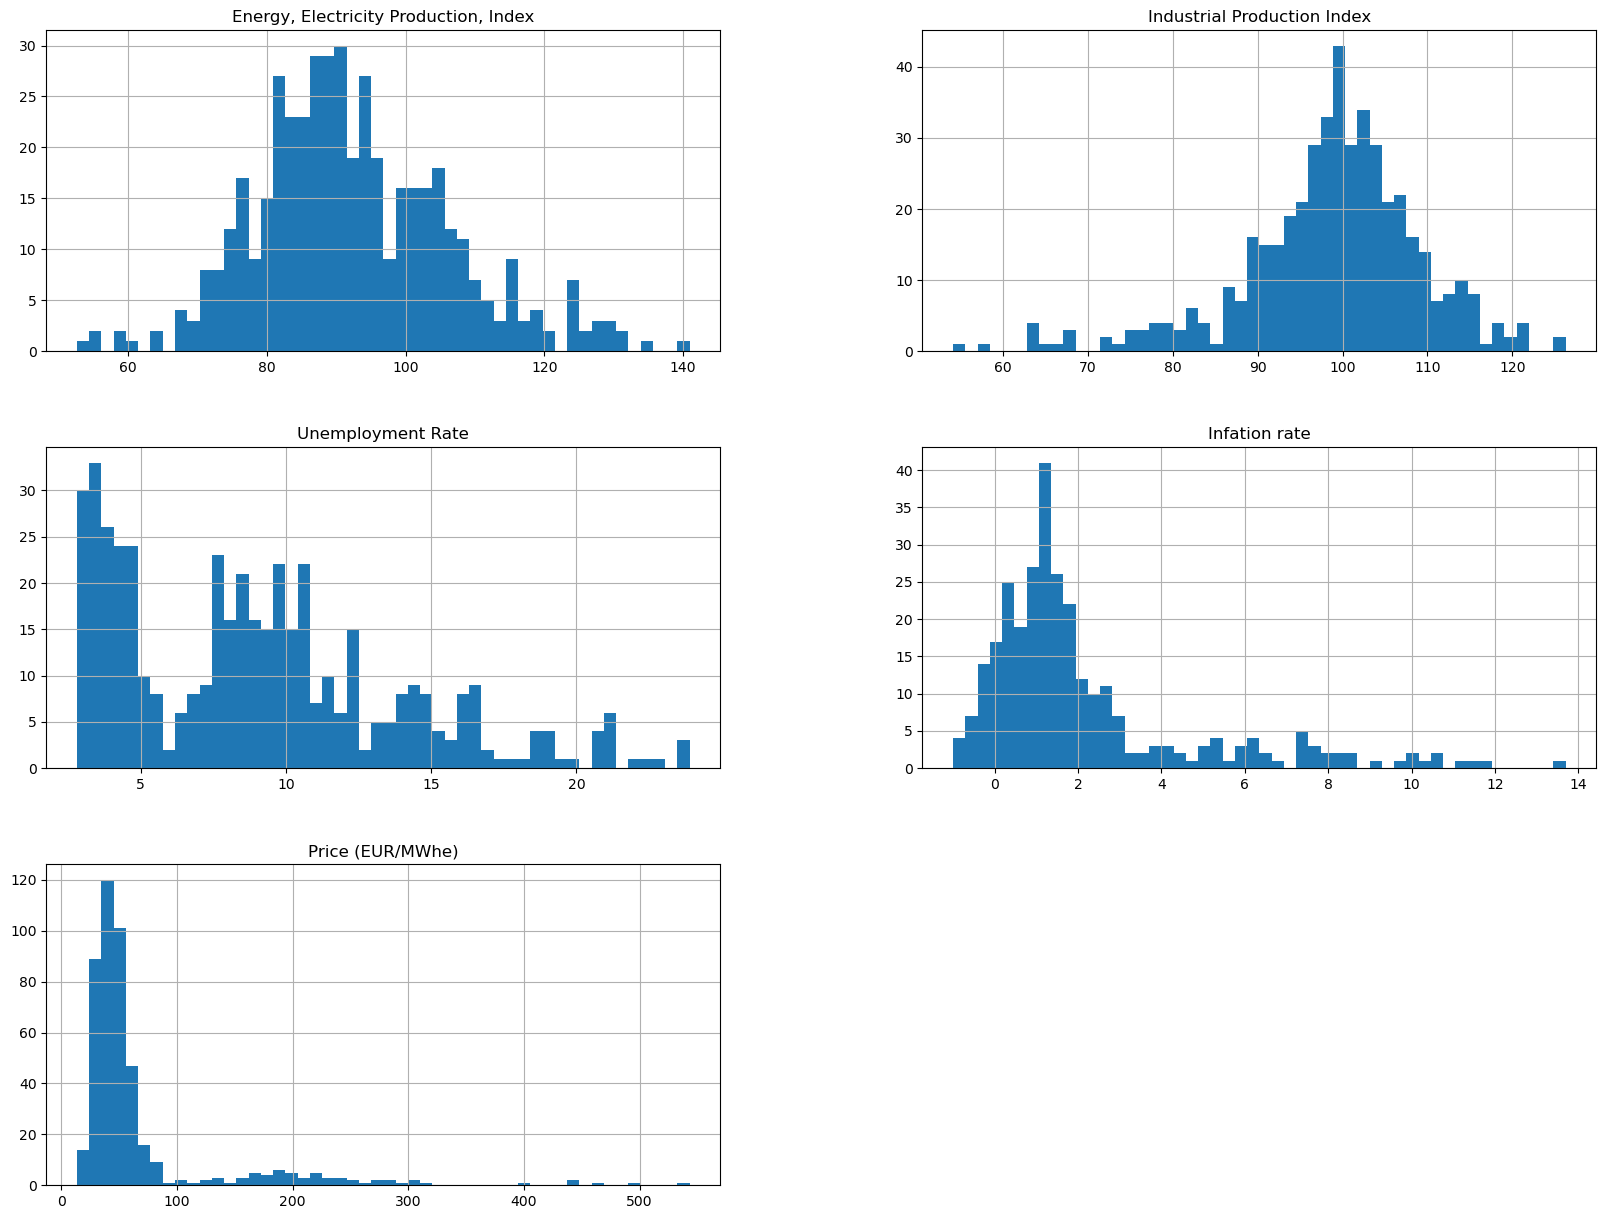

In [14]:
# visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
merged_data.hist(bins=50, figsize=(20,15))
plt.show()

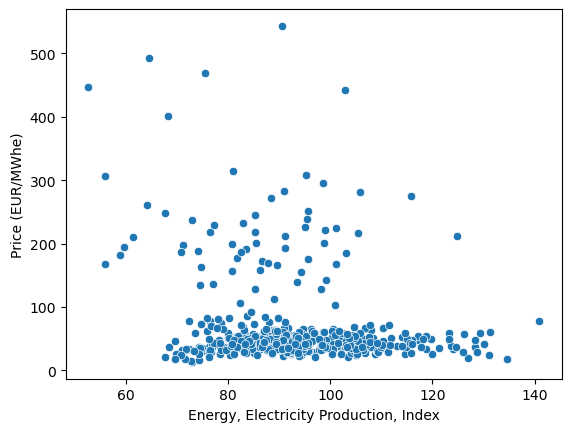

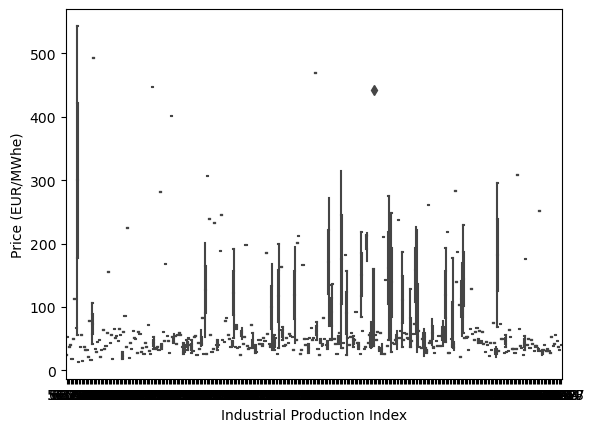

In [15]:
# Scatter plots
sns.scatterplot(x='Energy, Electricity Production, Index', y='Price (EUR/MWhe)', data=merged_data)
plt.show()

# Box plots
sns.boxplot(x='Industrial Production Index', y='Price (EUR/MWhe)', data=merged_data)
plt.show()

## 2-3 Correlation: 

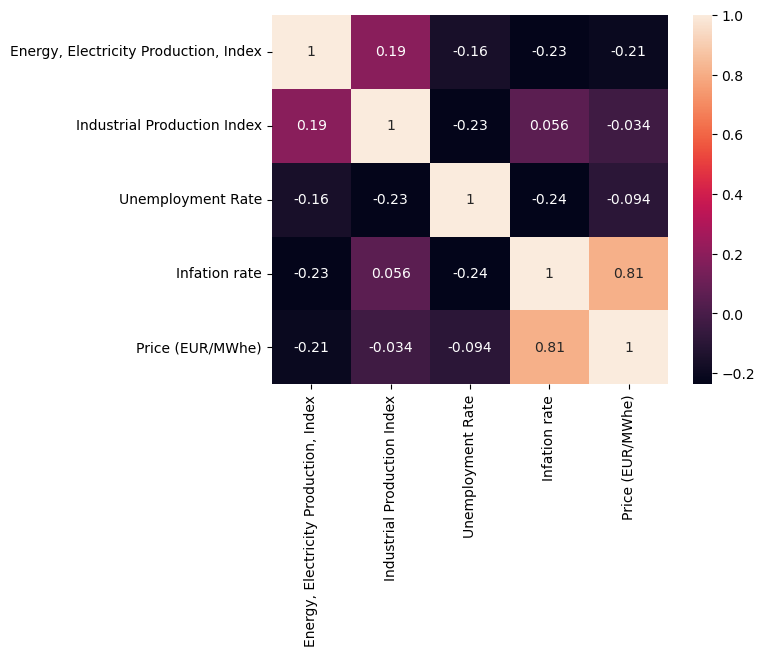

In [17]:
# Select only numeric variables from the dataset
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric variables
corr = numeric_data.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


## 2-4 Missing values:

In [18]:
# Check for missing values
print(merged_data.isna().sum())

Date                                       0
Country                                    0
Energy, Electricity Production, Index      0
Industrial Production Index                0
Unemployment Rate                          0
Infation rate                            162
Price (EUR/MWhe)                           0
dtype: int64


In [21]:
# Select only numeric variables from the dataset
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Fill missing values with the mean of each numeric column
numeric_data = numeric_data.fillna(numeric_data.mean())

# Replace the columns in the original dataset with the imputed numeric columns
merged_data[numeric_data.columns] = numeric_data

In [22]:
## 2-5 Dummy variables:
# Convert categorical to numeric 
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on the 'Country' column of your dataset
encoder.fit(merged_data['Country'])

# Transform the 'Country' column to numeric values
merged_data['Country'] = encoder.transform(merged_data['Country'])

# 3- Modeling 

## 3-1 Import the necessary libraries

In [24]:
# Import libraries 
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.optim as optim

## 3-2 Split the data into training and testing sets:

In [25]:
# Split the dataset into training and test sets
X = merged_data.drop(columns=["Price (EUR/MWhe)","Date"])
y = merged_data["Price (EUR/MWhe)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3-3 Convert dataframe to PyTorch tensors

In [26]:
# Convert dataframe to PyTorch tensors
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(y_train.values).float()
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(y_test.values).float()

## 3-4 Define the model: 

In [27]:
# Define the neural network
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(5, 256)
        self.layer2 = nn.Linear(256, 64)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Create an instance of the MLP
net = MLP()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

## 3-5 Train the model:

In [28]:
# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = net(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


C:\Users\DELL\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([368])) that is different to the input size (torch.Size([368, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 10521.23046875
Epoch 100, Loss: 5332.2236328125
Epoch 200, Loss: 5326.86279296875
Epoch 300, Loss: 5325.3974609375
Epoch 400, Loss: 5324.04443359375
Epoch 500, Loss: 5322.39404296875
Epoch 600, Loss: 5319.796875
Epoch 700, Loss: 5317.46337890625
Epoch 800, Loss: 5315.1455078125
Epoch 900, Loss: 5313.3525390625


## 3-6 Evaluate the model:  

In [29]:
# Evaluate the model on the test set
y_test_pred = net(X_test)
test_loss = criterion(y_test_pred, y_test)
print(f"Test Loss: {test_loss.item()}")

Test Loss: 5308.69677734375


C:\Users\DELL\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([92])) that is different to the input size (torch.Size([92, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [30]:
from torch import sqrt

# Calculate RMSE
rmse = sqrt(criterion(y_test_pred, y_test))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = criterion(y_test_pred.abs(), y_test.abs())
print(f"MAE: {mae}")

RMSE: 72.86080169677734
MAE: 5308.69677734375
